In [47]:
import pandas as pd

# load the dataset.csv
df = pd.read_csv('../dataset.csv')
df.describe()

,pregnant,glucose_concentration,blood_pressure,skinfold_thickness,serum_insulin,mass_index,pedigree_function,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [81]:
from sklearn.discriminant_analysis import StandardScaler


numeric_features = df.drop(columns=['class']).select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
df[numeric_features.columns] = scaler.fit_transform(numeric_features)
df.head()

,pregnant,glucose_concentration,blood_pressure,skinfold_thickness,serum_insulin,mass_index,pedigree_function,age,class
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [84]:
# use PDA(Principal Component Analysis) to reduce the dimensionality of the dataset
from sklearn.decomposition import PCA
import numpy as np

X, y = df.drop(columns=["class"]), df["class"]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X.columns[np.argmax(np.abs(pca.components_[0]))], X.columns[np.argmax(np.abs(pca.components_[1]))]

('mass_index', 'age')

In [76]:
# use LDA(Linear Discriminant Analysis) to reduce the dimensionality of the dataset
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# lda = LinearDiscriminantAnalysis(n_components=1)
# lda.fit(df, df['class'])
# df_lda = lda.transform(df)


In [77]:
# use tree classifier to classify the dataset
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print('Accuracy of tree classifier on training set: {:.2f}'.format(tree.score(X_train, y_train)))
print('Accuracy of tree classifier on test set: {:.2f}'.format(tree.score(X_test, y_test)))

Accuracy of tree classifier on training set: 1.00
Accuracy of tree classifier on test set: 0.70


In [78]:
# use naive bayes classifier to classify the dataset
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.77
Accuracy of GNB classifier on test set: 0.74


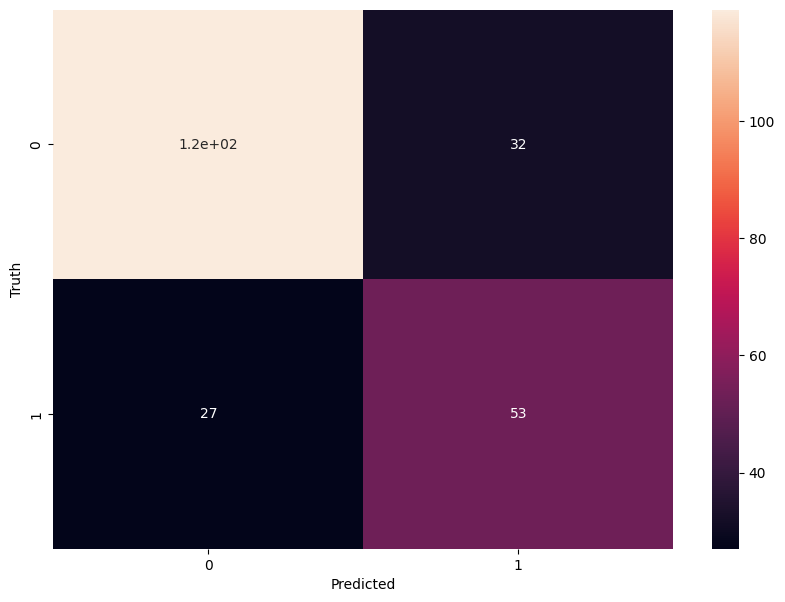

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



In [79]:
# plot the confusion matrix of the naive bayes classifier using numbers instead of colors
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = gnb.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

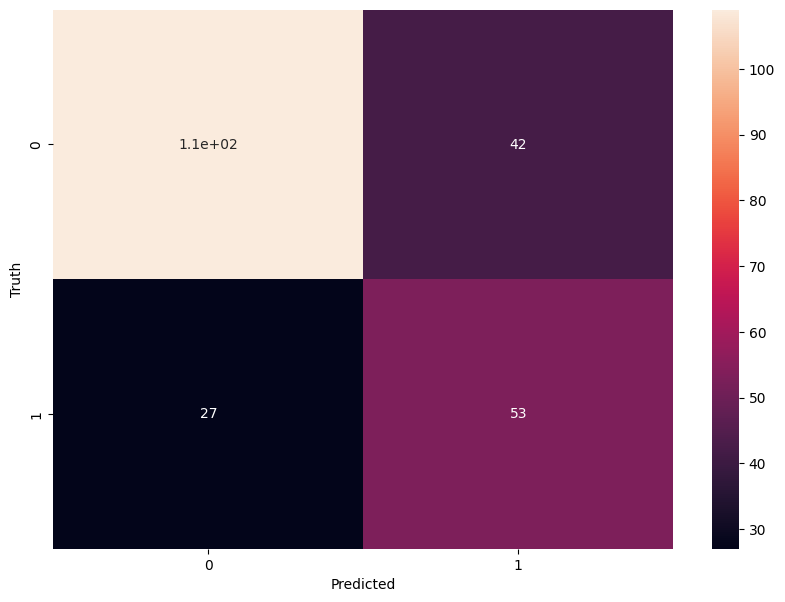

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.56      0.66      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.71       231



In [80]:
# plot the confusion matrix of the tree classifier using numbers instead of colors
y_pred = tree.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# print sensitivity, accuracy, f1 score, and specificity of the naive bayes classifier
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))